# Market Segmentation Analysis

## Steps
4. [Exploring Data](#step-4-exploring-data)
5. [Extracting Segments](#step-5-extracting-segments)
6. [Profiling Segments](#step-6-profiling-segments)
7. [Describing Segments](#step-7-describing-segments)
8. [Selecting (the) Target Segment(s)](#step-8-selecting-the-target-segments)

## Step 4: Exploring Data

In [281]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic



In [282]:
warnings.filterwarnings("ignore")

[McDonalds dataset](https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv)

Download Dataset or simply use `pd.read_csv(url)`

In [283]:
if not os.path.exists('mcdonalds.csv'):
    data = requests.get(
        'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
    data = data.text
    with open('mcdonalds.csv', 'w') as f:
        f.write(data)
    print('mcdonalds.csv [Downloaded now]')
else:
    print('mcdonalds.csv [Already downloaded]')

mcdonalds.csv [Already downloaded]


In [320]:
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [321]:
df.shape

(1453, 15)

In [322]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [323]:
df.Like.value_counts()


Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [324]:
df = df.replace({"Yes": 1, "No": 0})

In [289]:
df1 = df.iloc[:, :11]
df1.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [290]:
pca = PCA()
df2 = pca.fit_transform(df1)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [291]:
summ = pca_df.describe().loc["std"].to_frame()
std_deviations = summ["std"]
summ["variance"] =  [(std_dev ** 2) / np.sum(np.square(std_deviations)) for std_dev in std_deviations]
summ["Cumulative Proportion"] = np.cumsum(summ["variance"])
summ

,std,variance,Cumulative Proportion
yummy,0.757050,0.299447,0.299447
convenient,0.607456,0.192797,0.492244
spicy,0.504619,0.133045,0.625290
fattening,0.398799,0.083096,0.708386
greasy,0.337405,0.059481,0.767866
fast,0.310275,0.050300,0.818166
cheap,0.289697,0.043849,0.862015
tasty,0.275122,0.039548,0.901563
expensive,0.265251,0.036761,0.938323
healthy,0.248842,0.032353,0.970677


In [292]:
t_pca_df = pca_df.head(11).T
t_pca_df.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7","PC8", "PC9", "PC10", "PC11"]
t_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.425367,-0.218638,0.375415,-0.172926,0.187057,-0.852122,-0.405961,-0.547679,1.705573,0.118548,0.471078
convenient,-0.219079,0.388190,0.730435,-0.352752,-0.807610,-0.149257,1.158064,-0.213096,0.258617,0.998823,-0.960021
spicy,0.663255,-0.730827,-0.122040,-0.843795,0.028537,0.047150,0.375889,-0.755223,0.048778,-0.581516,0.550287
fattening,-0.401300,-0.094724,0.692262,0.206998,0.548332,-0.416501,0.493465,-0.162540,0.343028,-0.213683,-0.099577
greasy,0.201705,0.044669,0.839643,-0.681415,0.854074,-0.313605,0.170709,0.047794,-0.422671,0.173642,-0.524379
fast,-0.389767,-0.086596,-0.687406,-0.036133,-0.097305,-0.034602,-0.726015,0.174745,0.654405,0.016644,-0.339304
cheap,-0.211982,-0.095877,0.583112,-0.054284,-0.457043,-0.063662,0.266424,-0.027493,-0.015571,-0.055428,-0.170389
tasty,0.163235,-0.034756,0.364379,-0.231477,0.171758,0.073945,0.515661,-0.064296,0.458631,-0.174817,-0.033485
expensive,0.181007,0.111476,-0.322288,-0.028003,-0.074409,0.047327,0.252962,0.044480,-0.118123,0.035407,0.041528
healthy,0.515706,0.493313,0.061759,-0.250678,0.031897,0.030206,-0.057233,0.038914,0.233020,0.065225,-0.228285


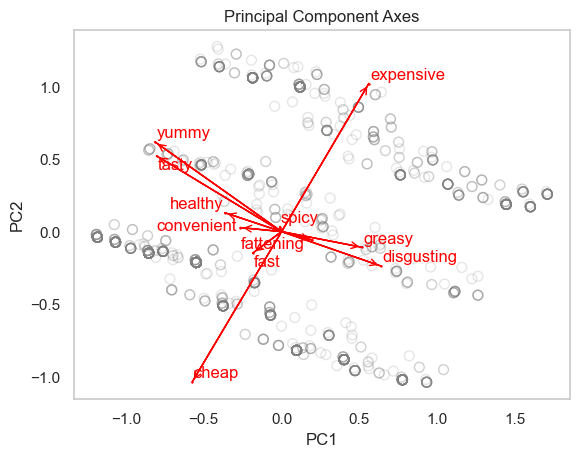

In [331]:
from adjustText import adjust_text
plt.scatter(x=pca_df['yummy'], y=pca_df['convenient'],  edgecolor='Grey', linewidths=1, facecolor='none', alpha=0.2, s=50)

scale = 1.7
texts = []
for i,j in enumerate(pca_df.columns):
    text = plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i])*scale, 
        j, 
        color='red',
        fontsize=12,
        ha='center',  # Horizontally center the text
        va='bottom',
        stretch="expanded"
        
    )
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
adjust_text(texts)
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale,
    s = 0.5,
    color='red'
    
)

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

## Step 5: Extracting Segments

[Customer Segmentation Using K Means Clustering](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

In [294]:
np.random.seed(0)

In [295]:
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df1)
    labels = model.predict(df1)
    silhouette_score_ = silhouette_score(df1, labels)
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

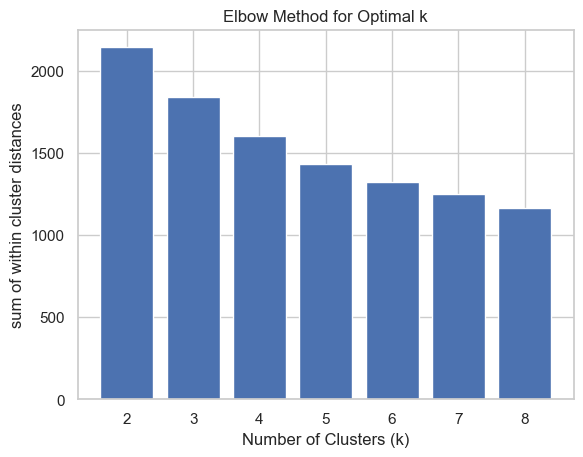

In [296]:
plt.bar(k_range, inertias)
plt.grid(False)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('sum of within cluster distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)  # Set x-axis ticks to match k values
plt.show()

- [Clustering Performance Evaluation in Scikit Learn](https://www.geeksforgeeks.org/clustering-performance-evaluation-in-scikit-learn/)
- [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [297]:
ARI_scores = []
for label in k_result:
    boot_n =200
    sample_size =len(label)
    ari_boot = []
    bootstrap_samples = []
    for i in range(200):
        # Draw random indices with replacement
        random_indices = np.random.choice(label, size=sample_size, replace=True)

        # Create a bootstrap sample using the drawn indices
        bootstrap_sample = [label[idx] for idx in random_indices]

        # Append the bootstrap sample to the list
        bootstrap_samples.append(bootstrap_sample)
        ari = adjusted_rand_score(label, bootstrap_sample)
        ari_boot.append(ari+0.01)
    ARI_scores.append(ari_boot)
    

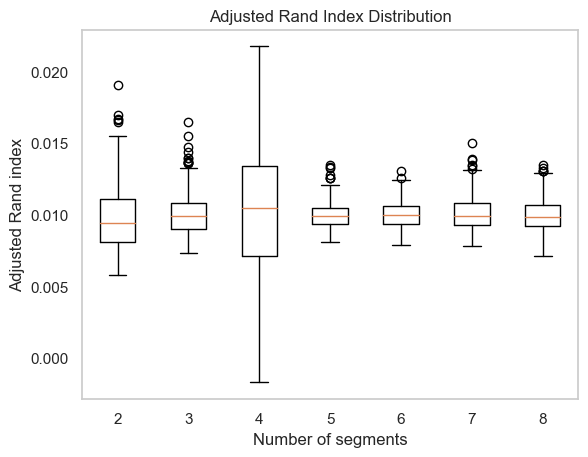

In [330]:
plt.boxplot(ARI_scores, labels=range(2, 9))
plt.grid(False)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [299]:
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df1)
label4 = model.predict(df1)

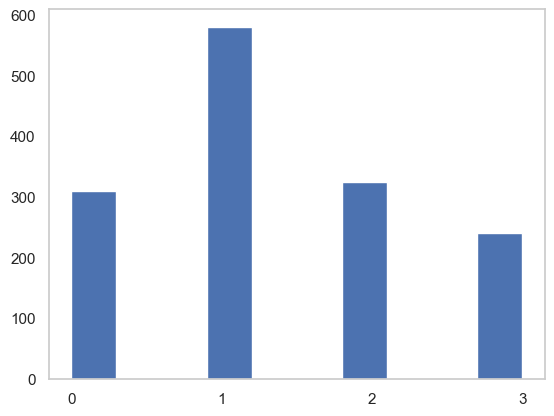

In [329]:
plt.hist(label4)
plt.xticks(range(4))
plt.grid(False)
plt.show()

### Using mixture of distribution

   Clusters  Log Likelihood           AIC           BIC
0         2        7.672279 -21985.641850 -21167.027072
1         3       10.815627 -30964.212141 -29733.649281
2         4       12.547950 -35842.341672 -34199.830730
3         5       16.020101 -45776.412792 -43721.953769
4         6       16.797894 -47880.679042 -45414.271937
5         7       18.219882 -51856.976067 -48978.620880
6         8       20.006166 -56891.918130 -53601.614862


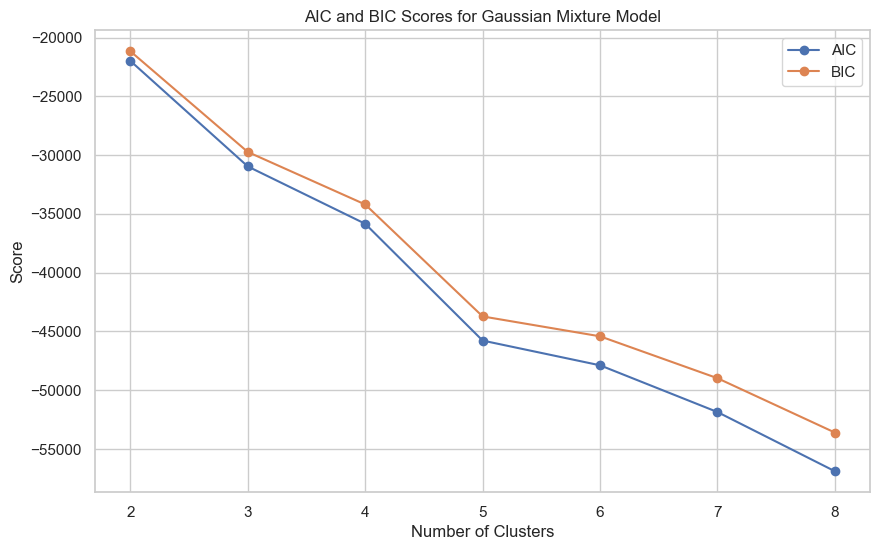

In [301]:


# Load the data
data = df1
log_likelihoods = []
aic_scores = []
bic_scores = []
# Fit a mixture of Gaussians with 2 to 8 components
models = []
for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(data)
    models.append(model)
    log_likelihoods.append(model.score(data))
    aic_scores.append(model.aic(data))
    bic_scores.append(model.bic(data))
# Print the results
results_df = pd.DataFrame({
    'Clusters': k_range,
    'Log Likelihood': log_likelihoods,
    'AIC': aic_scores,
    'BIC': bic_scores
})

# Print the results
print(results_df)
plt.figure(figsize=(10, 6))
plt.plot(k_range, aic_scores, marker='o', label='AIC')
plt.plot(k_range, bic_scores, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

In [302]:
gmm = GaussianMixture(
    n_components=4, 
    n_init=10, 
    random_state=0
)
gmm.fit(df1)

cluster_assignments_gmm = gmm.predict(df1)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(df1)
labels = model.predict(df1)

conf_matrix = confusion_matrix(
    labels, 
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  2 243   7  57]
 [138 432  10   0]
 [248  27  49   0]
 [  0  14  39 187]]


## Step 6: Profiling Segments

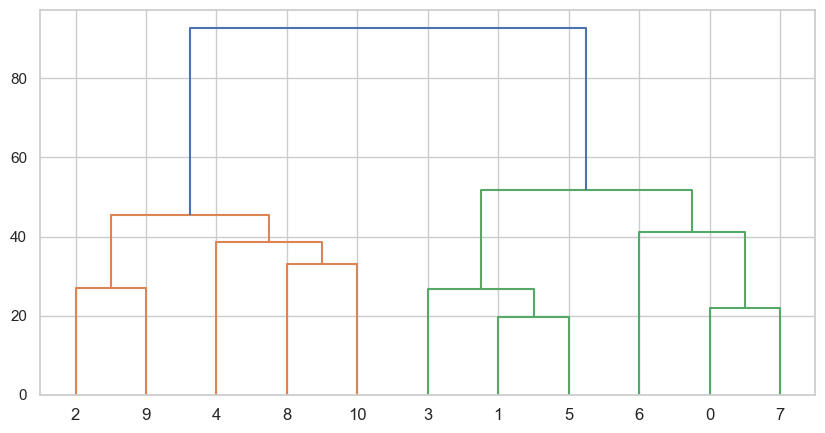

In [303]:

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import pairwise_distances


distances = pairwise_distances(df1.T, metric='euclidean')
linkage_matrix = linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.show()

In [304]:
df3 = df1.copy()
df3["cluster"]= label4
df3["cluster"].value_counts()

cluster
1    580
2    324
0    309
3    240
Name: count, dtype: int64

In [317]:
data = {
    'Attribute': df1.columns,
    'Cluster0': np.zeros(df1.shape[1]),
    'Cluster1': np.zeros(df1.shape[1]),
    'Cluster2': np.zeros(df1.shape[1]),
    'Cluster3': np.zeros(df1.shape[1])
}
# cluster_data = pd.DataFrame(data)

for i, value in enumerate(df3["cluster"].value_counts().sort_index()):
    df3c = df3[df3.cluster == i].drop(columns="cluster")
    df3c = df3c.sum()/value
    data[f"Cluster{i}"] = df3c.values

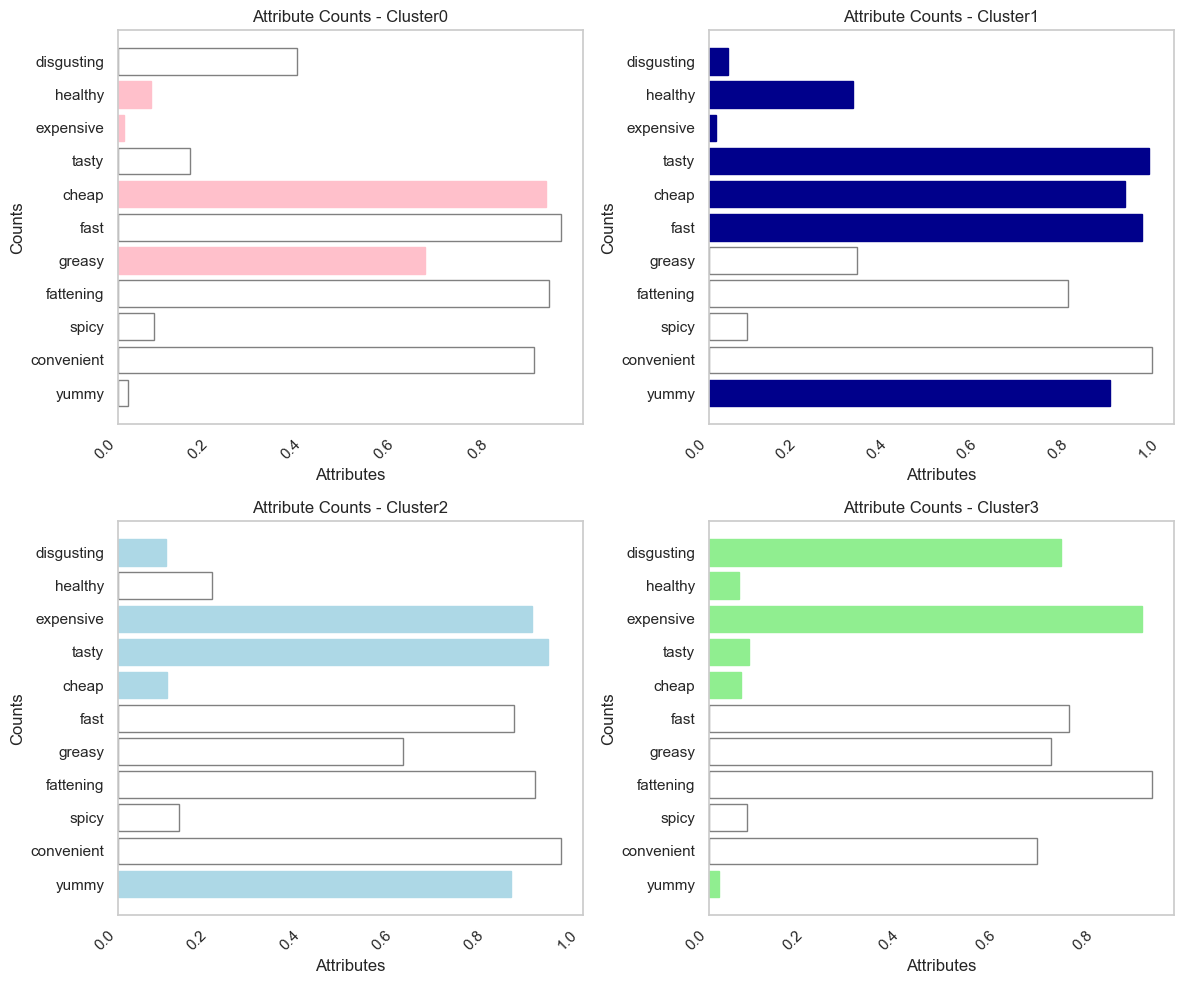

In [327]:
# Create a DataFrame
df4= pd.DataFrame(data)

# Plotting
clusters = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(clusters, 1):
    if idx==1: 
        highlighted_attributes = [6, 4, 8,9]
        color="pink"
    elif idx==2:
        highlighted_attributes = [0,5,6,7,8,9,10]
        color="darkblue"
    elif idx==3:
        highlighted_attributes = [0,6,7,8,10]
        color="lightblue"
    else:
        highlighted_attributes = [0, 6,7,8,9,10]
        color="lightgreen"
    plt.subplot(2, 2, idx)
    bars = plt.barh(df4['Attribute'], df4[cluster],edgecolor='Grey', facecolor='none',)
    for i in highlighted_attributes:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(f'Attribute Counts - {cluster}')
    plt.xticks(rotation=45, ha='right')
    

plt.tight_layout()

plt.show()


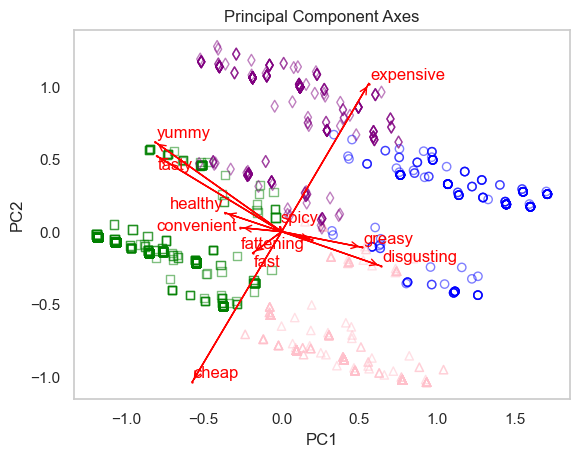

In [333]:

k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)
texts = []

markers = ['o', 's', '^', 'd']

# Define different edge colors for each cluster
edge_colors = ['blue', 'green', 'pink', 'purple']

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i,
        edgecolor=edge_colors[i],
        marker=markers[i],
        facecolor='none',
        alpha = 0.5
    )
scale = 1.7

for i,j in enumerate(pca_df.columns):
    text = plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i])*scale, 
        j, 
        color='red',
        fontsize=12,
        ha='center',  # Horizontally center the text
        va='bottom',
        stretch="expanded"
        
    )
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
adjust_text(texts)
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale,
    s = 0.5,
    color='red'
    
)

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

## Step 7: Describing Segments

In [334]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [335]:
li = df.Like.replace({
    'I love it!+5':5,
    '+4':4,
    '+3':3,
    '+2':2,
    '+1':1,
    '0': 0,
    '-1': -1,
    '-2':-2,
    '-3':-3,
    '-4':-4,
    'I hate it!-5':-5
})

<Figure size 1000x600 with 0 Axes>

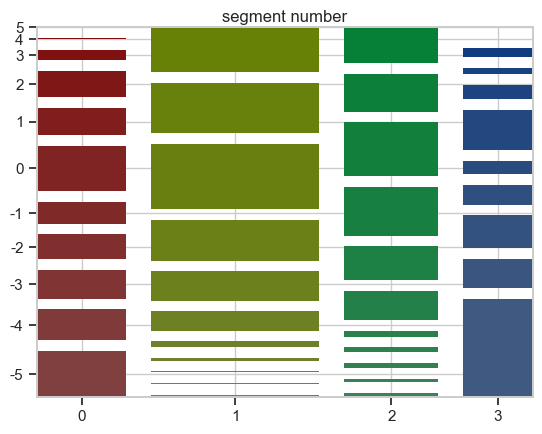

In [337]:


# Sample data (replace this with your actual data)
data = {
    'segment': label4,
    'lovehate': li
}

# Creating a DataFrame
ds = pd.DataFrame(data)

# Create a crosstabulation table
crosstab = pd.crosstab(ds['segment'], ds['lovehate'])


# Create a mosaic plot using seaborn
plt.figure(figsize=(10, 6))
mosaic_data = crosstab.stack()
mosaic(mosaic_data, title='', axes_label=True, gap=0.06, labelizer=lambda k: '')

# for i, (r, c) in enumerate(mosaic_data.index):
#     col_idx = crosstab.columns.get_loc(c)
#     plt.gca().patches[i].set_color(cmap((residuals[r, col_idx] + 2) / 4))  # Normalize residuals to [0, 1] for colormap
plt.grid(False)
plt.title('')
plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()


<Figure size 1000x600 with 0 Axes>

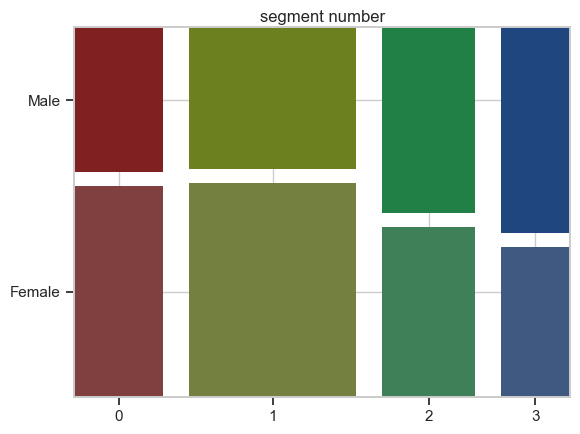

In [328]:
## Example code

data = {
    'segment': label4,
    'lovehate': df.Gender
}

# Creating a DataFrame
ds = pd.DataFrame(data)

# Create a crosstabulation table
crosstab = pd.crosstab(ds['segment'], ds['lovehate'])


# Create a mosaic plot using seaborn
plt.figure(figsize=(10, 6))
mosaic_data = crosstab.stack()
mosaic(mosaic_data, title='', axes_label=True, gap=0.06, labelizer=lambda k: '')

# for i, (r, c) in enumerate(mosaic_data.index):
#     col_idx = crosstab.columns.get_loc(c)
#     plt.gca().patches[i].set_color(cmap((residuals[r, col_idx] + 2) / 4))  # Normalize residuals to [0, 1] for colormap

plt.title('')
plt.xlabel('segment number')
plt.ylabel('Count')
plt.grid(False)
plt.show()

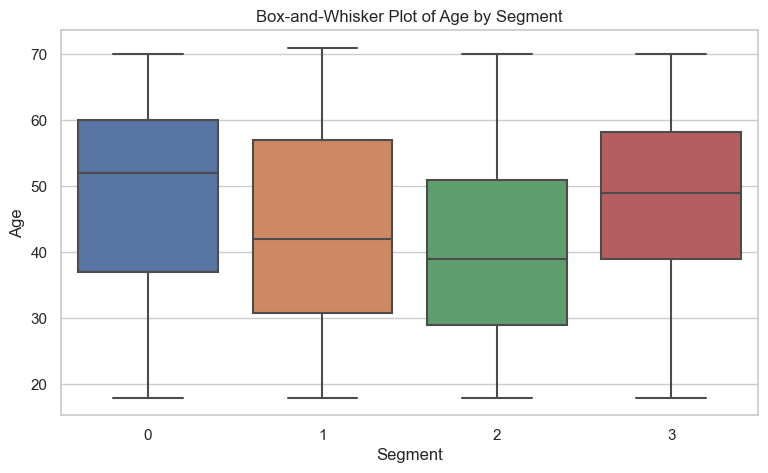

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data)
data = {
    'segment': label4,
    'Age': df.Age
}

# Creating a DataFrame
ds = pd.DataFrame(data)

plt.figure(figsize=(9, 5))
sns.boxplot(x='segment', y='Age', data=ds)

# Customize labels and title
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Box-and-Whisker Plot of Age by Segment')

plt.show()



## Step 8: Selecting (the) Target Segment(s)

In [356]:


# Sample data (replace this with your actual data)
data = {
    'segment': label4,
    'lovehate': li,  # Just using Age for demonstration
    'Age': df.Age,
    'VisitFrequency': df.VisitFrequency,
    'Gender': df.Gender
}

# Creating a DataFrame
ds = pd.DataFrame(data)

# Define a mapping of visit frequency categories to numeric values
visit_frequency_mapping = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}
gender_mapping = {
    "Female":0,
    "Male":1
}
# Map visit frequency categories to numeric values
ds['VisitFrequencyNumeric'] = ds['VisitFrequency'].map(visit_frequency_mapping)
ds["GenderNumeric"] = ds["Gender"].map(gender_mapping)
# Calculate the mean visit frequency for each cluster
visit = ds.groupby('segment')['VisitFrequencyNumeric'].mean()
like = ds.groupby('segment')['lovehate'].mean()
female = ds.groupby('segment')["GenderNumeric"].mean()
print(visit)
print(like)
print(female)


segment
0    2.676375
1    4.122414
2    3.984568
3    2.450000
Name: VisitFrequencyNumeric, dtype: float64
segment
0   -1.495146
1    2.665517
2    2.120370
3   -2.675000
Name: lovehate, dtype: float64
segment
0    0.407767
1    0.398276
2    0.521605
3    0.579167
Name: GenderNumeric, dtype: float64


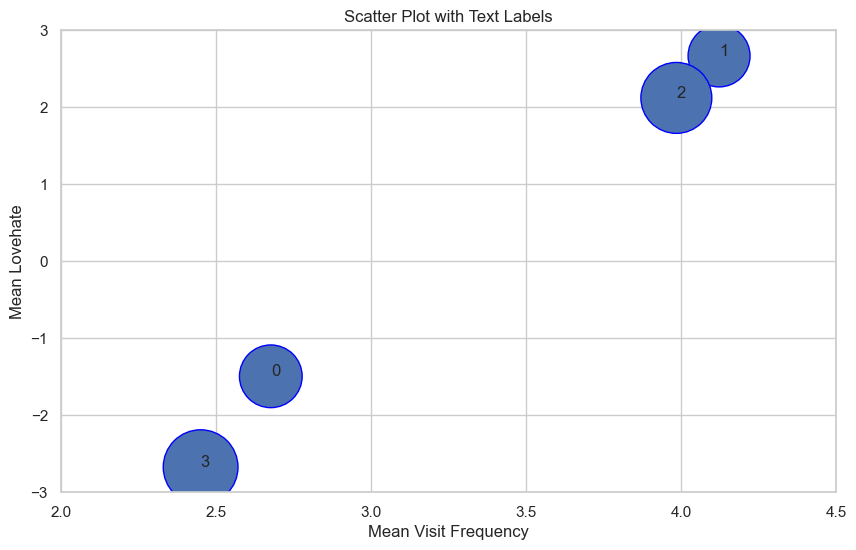

In [364]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=5000 * female, facecolor=None,edgecolor="blue")

# Add text labels
for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i))

# Set axis limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Customize labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Lovehate')
plt.title('Scatter Plot with Text Labels')

plt.show()